# mnist 손글씨

## DNN

In [56]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
from keras.utils import to_categorical

In [20]:
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000, 10)

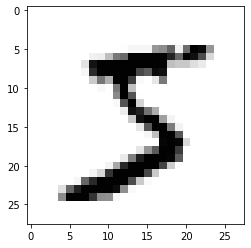

In [9]:
plt.imshow(x_train[0], cmap='Greys')
plt.show()

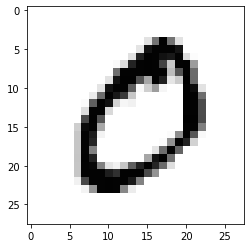

In [10]:
plt.imshow(x_train[1], cmap='Greys')
plt.show()

In [11]:
modell = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                         keras.layers.Dense(128, activation='relu'),
                         keras.layers.Dense(10, activation='softmax')])

In [12]:
modell .compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
modell.fit(x_train, y_train, epochs=50, batch_size=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2790 - accuracy: 0.9207
Epoch 2/50
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1258 - accuracy: 0.9637
Epoch 3/50
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0871 - accuracy: 0.9744
Epoch 4/50
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0656 - accuracy: 0.9804
Epoch 5/50
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0514 - accuracy: 0.9847
Epoch 6/50
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0410 - accuracy: 0.9879
Epoch 7/50
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0326 - accuracy: 0.9906
Epoch 8/50
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0266 - accuracy: 0.9919
Epoch 9/50
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0217 - accuracy: 0.9934
Epoch 10/50
60

In [14]:
test_loss, test_acc = modell.evaluate(x_test, y_test, verbose=2)
print('\n Test Accuracy : %.4f' % (modell.evaluate(x_test, y_test, verbose=0)[1]))

10000/10000 - 0s - loss: 0.1579 - accuracy: 0.9768

 Test Accuracy : 0.9768


## CNN

In [58]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [59]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [60]:
model = Sequential([
    Conv2D(128, kernel_size=(2, 2), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 27, 27, 128)       640       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 26, 26, 64)        32832     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)            

In [61]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [62]:
# model.compile(loss=keras.losses.categorical_crossentropy,
#              optimizer = keras.optimizers.Adam(),
#              metrics=[keras.metrics.categorical_accuracy])

In [63]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [64]:
modelpath = MODEL_DIR + 'mnist-cnn-{epoch:02d}-{val_loss:.4f}.hdf5'
chekpointer = ModelCheckpoint(modelpath, verbose=1, save_best_only=True)
early_stopping_cb = EarlyStopping(patience=10)

In [65]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=30, batch_size=200, callbacks=[chekpointer, early_stopping_cb])

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
47800/48000 [============================>.] - ETA: 0s - loss: 0.5692 - accuracy: 0.8176
Epoch 00001: val_loss improved from inf to 0.13486, saving model to ./model/mnist-cnn-01-0.1349.hdf5
48000/48000 [==============================] - 68s 1ms/sample - loss: 0.5681 - accuracy: 0.8179 - val_loss: 0.1349 - val_accuracy: 0.9682
Epoch 2/30
47800/48000 [============================>.] - ETA: 0s - loss: 0.2272 - accuracy: 0.9314
Epoch 00002: val_loss improved from 0.13486 to 0.09528, saving model to ./model/mnist-cnn-02-0.0953.hdf5
48000/48000 [==============================] - 68s 1ms/sample - loss: 0.2272 - accuracy: 0.9315 - val_loss: 0.0953 - val_accuracy: 0.9751
Epoch 3/30
47800/48000 [============================>.] - ETA: 0s - loss: 0.1733 - accuracy: 0.9484
Epoch 00003: val_loss improved from 0.09528 to 0.07229, saving model to ./model/mnist-cnn-03-0.0723.hdf5
48000/48000 [==============================] - 69s 1ms/sample -

Epoch 26/30
47800/48000 [============================>.] - ETA: 0s - loss: 0.0686 - accuracy: 0.9785
Epoch 00026: val_loss did not improve from 0.03614
48000/48000 [==============================] - 67s 1ms/sample - loss: 0.0684 - accuracy: 0.9785 - val_loss: 0.0366 - val_accuracy: 0.9892
Epoch 27/30
47800/48000 [============================>.] - ETA: 0s - loss: 0.0678 - accuracy: 0.9781
Epoch 00027: val_loss did not improve from 0.03614
48000/48000 [==============================] - 67s 1ms/sample - loss: 0.0677 - accuracy: 0.9781 - val_loss: 0.0374 - val_accuracy: 0.9888
Epoch 28/30
47800/48000 [============================>.] - ETA: 0s - loss: 0.0658 - accuracy: 0.9787
Epoch 00028: val_loss did not improve from 0.03614
48000/48000 [==============================] - 68s 1ms/sample - loss: 0.0658 - accuracy: 0.9787 - val_loss: 0.0374 - val_accuracy: 0.9900
Epoch 29/30
47800/48000 [============================>.] - ETA: 0s - loss: 0.0644 - accuracy: 0.9792
Epoch 00029: val_loss improve

In [66]:
del model

In [67]:
model = load_model('./model/mnist-cnn-30-0.0353.hdf5')

In [68]:
model.evaluate(x_test, y_test, verbose=4)[1]

0.9906

In [69]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

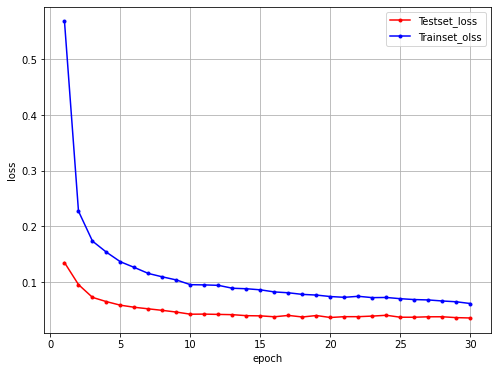

In [70]:
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_olss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()